In [70]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing:

### 1.	Import the necessary libraries and read the data.

In [71]:
fifa=pd.read_csv('fifa.csv')
fifa.head()
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

### 2.	Drop any columns that you deem unecessary for analysis.!

In [72]:
fifa2=fifa.drop(columns=['Photo','Flag','Club Logo'],axis=1)
fifa2.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 3.	The following columns need to be converted for further analysis:!

In [73]:
fifa2['Value']=fifa2['Value'].apply(lambda x:float(x.replace('K','').replace('€',''))*1000 if "K" in x  
                       else float(x.replace('M','').replace('€',''))*1000000)

In [74]:
fifa2['Wage']=fifa2['Wage'].apply(lambda x:float(x.replace('K','').replace('€',''))*1000 if "K" in x  
                       else float(x.replace('M','').replace('€',''))*1000000)

In [75]:
fifa2.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [76]:
fifa2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Position                    18147 non-null object
Jersey Number               18147 non-null float64
Joined                      16654 non-n

In [77]:
fifa2['Joined']=fifa2['Joined'].apply(lambda d:str(d)[-4:])
fifa2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Position                    18147 non-null object
Jersey Number               18147 non-null float64
Joined                      18207 non-n

In [78]:
fifa2['Contract Valid Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

In [79]:
#fifa2['Contract Valid Until']=fifa2['Contract Valid Until'].astype('datetime64[ns]')
#fifa2['Contract Valid Until']=pd.to_datetime(fifa2['Contract Valid Until'],format='%y',errors='ignore')
#fifa2['Contract Valid Until'].head()

In [80]:
fifa2['Height']=fifa2['Height'].apply(lambda x:float(str(x).replace("'",".")))

In [81]:
fifa2['Height'].head()

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64

In [82]:
fifa2['Weight']=fifa2['Weight'].apply(lambda x:str(x).replace('lbs',''))

In [83]:
fifa2['Weight'].head()

0    159
1    183
2    150
3    168
4    154
Name: Weight, dtype: object

In [84]:
fifa2['Release Clause'].head()

0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
Name: Release Clause, dtype: object

In [85]:
fifa2['Release Clause']=fifa2['Release Clause'].apply(lambda x:float(str(x).replace('K','').replace('€',''))*1000 if "K" in str(x)  
                       else float(str(x).replace('M','').replace('€',''))*1000000)

In [86]:
fifa2['Release Clause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64

### 4.	Check for missing values and do a mean imputation where necessary.!

In [87]:
fifa2=fifa2.fillna(fifa2.mean())
fifa2

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,1000.0,Right,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,1000.0,Right,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60000.0,1000.0,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,1000.0,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [88]:
fifa2.shape

(18207, 57)

### 1.	Plot the distribution of Overall rating for all players. 

Text(0.5, 1.0, 'Total Distribution of all player rating')

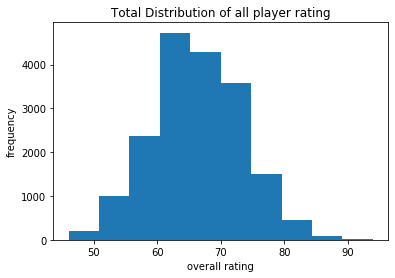

In [89]:
plt.hist(x=fifa2['Overall'])
plt.ylabel('frequency')
plt.xlabel('overall rating')
plt.title('Total Distribution of all player rating')


### 2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


In [90]:
import seaborn as sns

In [91]:
fifa2[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']]

,Overall,Value,Wage,International Reputation,Height,Weight,Release Clause
0,94,110500000.0,565000.0,5.0,5.70,159,226500000.0
1,94,77000000.0,405000.0,5.0,6.20,183,127100000.0
2,92,118500000.0,290000.0,5.0,5.90,150,228100000.0
3,91,72000000.0,260000.0,4.0,6.40,168,138600000.0
4,91,102000000.0,355000.0,4.0,5.11,154,196400000.0
...,...,...,...,...,...,...,...
18202,47,60000.0,1000.0,1.0,5.90,134,143000.0
18203,47,60000.0,1000.0,1.0,6.30,170,113000.0
18204,47,60000.0,1000.0,1.0,5.80,148,165000.0
18205,47,60000.0,1000.0,1.0,5.10,154,143000.0


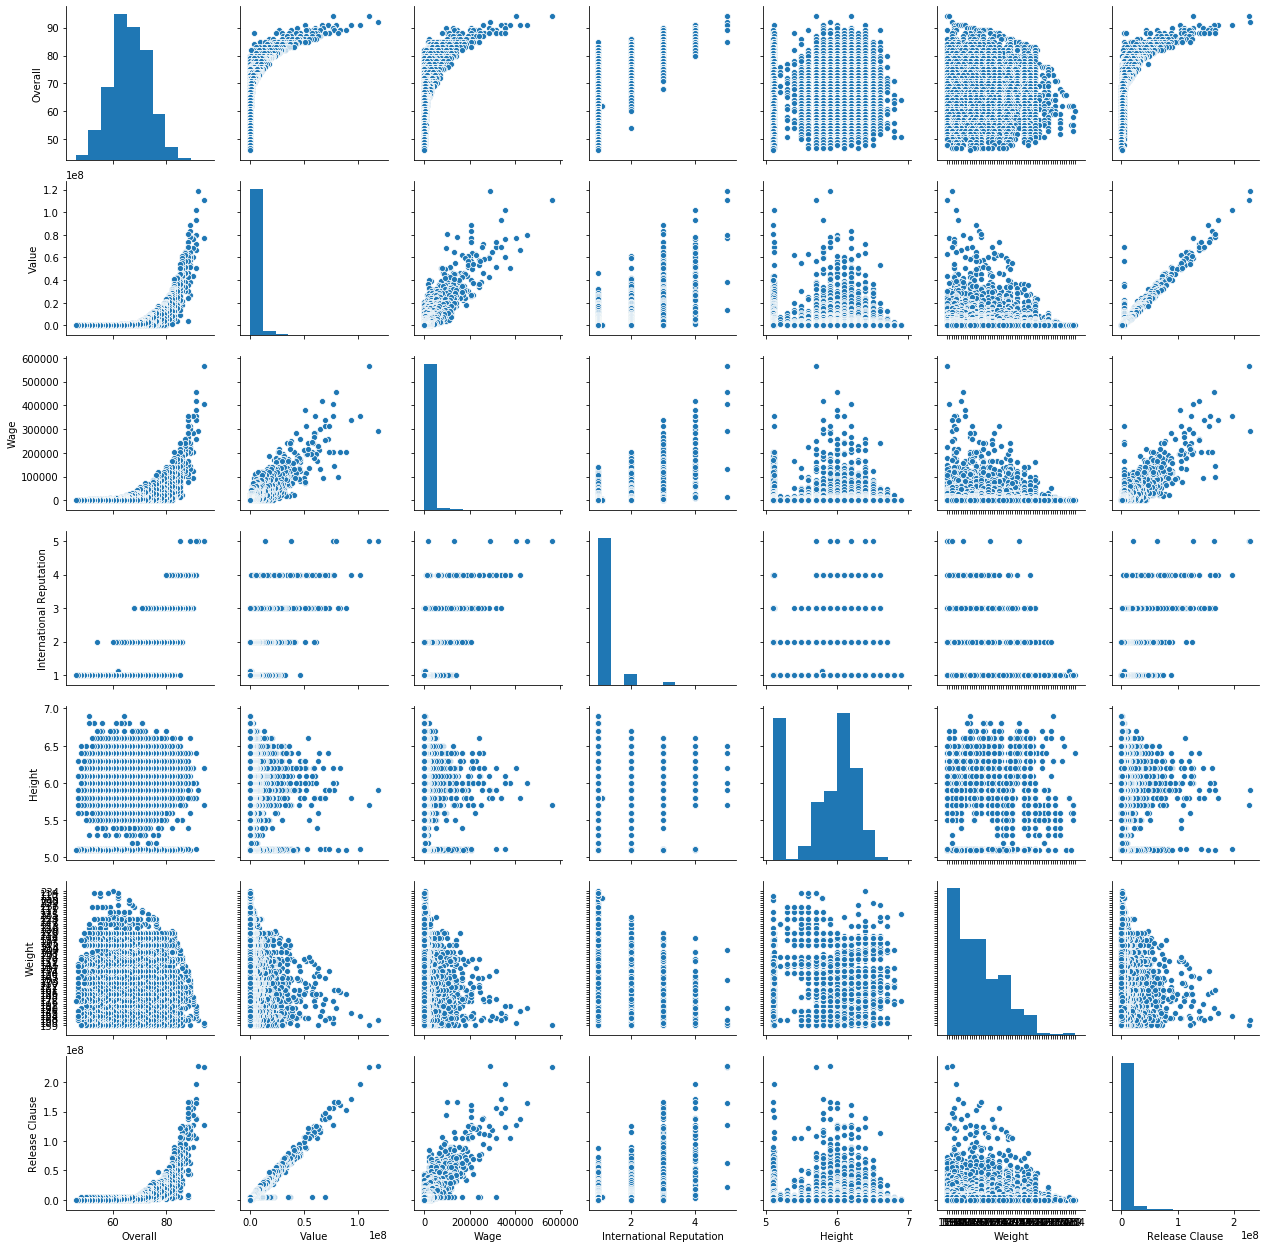

In [65]:
sns.pairplot(data=fifa2[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']])

### 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.!

In [95]:
fifa2.info()

fifa3=fifa2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Preferred Foot              18159 non-null object
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Position                    18147 non-null object
Jersey Number               18207 non-null float64
Joined                      18207 non-n

In [99]:
fifa3['Contract Valid Until']=fifa3[fifa3['Contract Valid Until']=='2020']


In [102]:
fifa3['Overall']=fifa3['Overall'].sort_values(ascending=False).head(20)

In [110]:
fifa4=fifa3.head(20)
fifa4['Overall'].head()

0    94.0
1    94.0
2    92.0
3    91.0
4    91.0
Name: Overall, dtype: float64

### a)	What would the average wage for this set of players be?!

In [116]:
fifa4['Wage'].mean()

289700.0

### b)	What is the average age?!

In [117]:
fifa4['Age'].mean()

28.3

#### c)	Is there a correlation between the Overall rating and Value for these players?

Text(0.5, 1.0, 'Overall vs Rating')

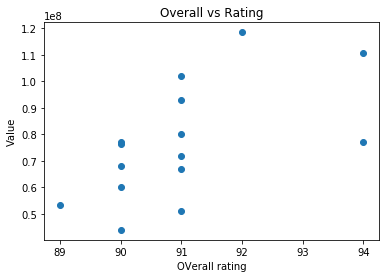

In [118]:
plt.scatter(x=fifa4['Overall'],y=fifa4['Value'])
plt.xlabel('OVerall rating')
plt.ylabel('Value')
plt.title('Overall vs Rating')

### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.!

In [151]:
#fifa2['Overall']=fifa2['Overall'].sort_values(ascending=False)


In [153]:
fifa2[['Position','Overall']]=fifa2[['Position','Overall']].sort_values(by=['Position','Overall'],ascending=[False,False])

In [154]:
fifa2[['Position','Overall']].head(20)

,Position,Overall
0,RF,94.0
1,ST,94.0
2,LW,92.0
3,GK,91.0
4,RCM,91.0
5,LF,91.0
6,RCM,91.0
7,RS,91.0
8,RCB,91.0
9,GK,90.0
